<a href="https://colab.research.google.com/github/AayushSharma-1/deeplearning/blob/master/NewPlantDiseaseDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q opendatasets

In [ ]:
import opendatasets as od

In [ ]:

 od.download('https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aayush9119
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:17<00:00, 161MB/s]


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import seaborn as sn
from sklearn.model_selection import train_test_split

In [ ]:
import os
from tqdm import tqdm
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
class_names = {class_name:i for i, class_name in enumerate(os.listdir('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'))}


In [ ]:
class_names
IMAGE_SIZE = (150 ,150)

In [ ]:
datagen_test = ImageDataGenerator(rescale = 1./255)
datagent_train = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
train_d = datagent_train.flow_from_directory(train_dir, target_size=(48, 48), batch_size=32, class_mode="categorical", color_mode="rgb" )
test_d = datagen_test.flow_from_directory(test_dir, target_size=(48, 48), batch_size=32, class_mode="categorical", color_mode="rgb")

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


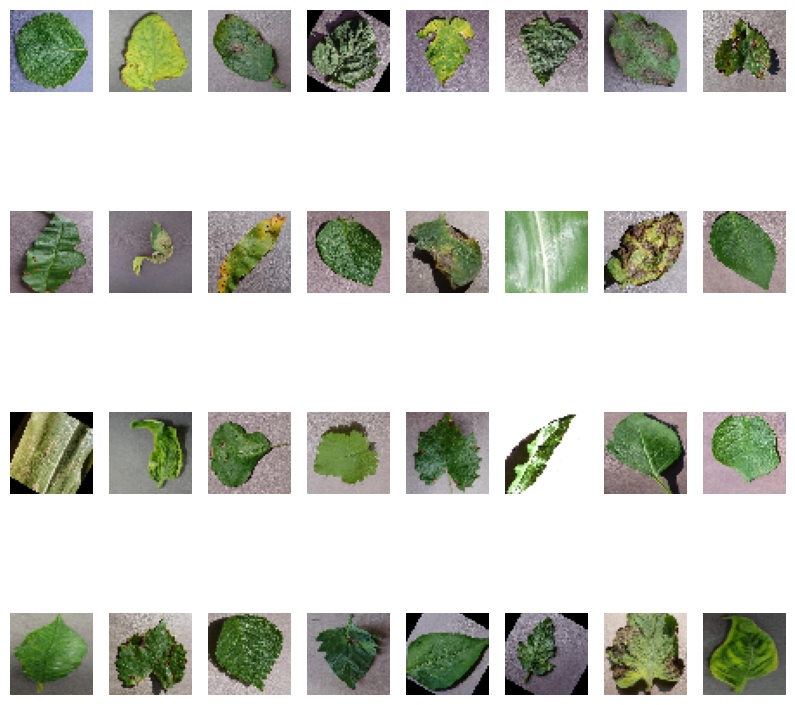

In [ ]:
images, img_labels = train_d.next()
plt.figure(figsize = (10,10))
for i in range (len(images)):
  plt.subplot(4,8,i+1)
  plt.imshow(images[i])
  plt.axis('off')



In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(128, kernel_size = (5, 5), padding='same', activation = 'relu', input_shape = (48, 48, 3)),
    keras.layers.MaxPool2D(pool_size= (3,3), strides = 2, padding = 'same'),
    keras.layers.Conv2D(64, kernel_size = (2,2), activation = 'relu', padding= 'same'),
    keras.layers.MaxPool2D((2,2),2, padding= 'same'),
    keras.layers.Conv2D(32, kernel_size=(2,2), activation = 'relu', padding= 'same'),
    keras.layers.MaxPool2D((2,2),2, padding = 'same'),

    keras.layers.Flatten(),
    keras.layers.Dense(units =128, activation='relu'),
    keras.layers.Dropout(rate = 0.25),
    keras.layers.Dense(units = 38, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
final_model = model.fit(train_d, batch_size = 5, epochs = 5)

Epoch 1/5
2197/2197 [==============================] - 98s 41ms/step - loss: 1.6612 - accuracy: 0.5092
Epoch 2/5
2197/2197 [==============================] - 79s 36ms/step - loss: 0.7933 - accuracy: 0.7488
Epoch 3/5
2197/2197 [==============================] - 78s 36ms/step - loss: 0.5804 - accuracy: 0.8125
Epoch 4/5
2197/2197 [==============================] - 79s 36ms/step - loss: 0.4855 - accuracy: 0.8423
Epoch 5/5
2197/2197 [==============================] - 78s 36ms/step - loss: 0.4252 - accuracy: 0.8618


In [16]:
model.evaluate(test_d)

550/550 [==============================] - 22s 38ms/step - loss: 0.3168 - accuracy: 0.8962


[0.31683072447776794, 0.8961985111236572]

In [22]:
predictions = model.predict(test_d)

550/550 [==============================] - 19s 33ms/step


In [24]:
predictions

array([[1.5800555e-07, 3.2477971e-09, 2.3763697e-04, ..., 9.8799264e-01,
        4.7549981e-10, 5.7794338e-12],
       [4.2048302e-07, 6.0659373e-04, 1.7207272e-05, ..., 2.3472762e-09,
        2.2823271e-11, 2.3573150e-11],
       [1.0519362e-03, 9.0884072e-10, 4.1367641e-01, ..., 1.5962178e-06,
        1.4601433e-11, 2.1232374e-06],
       ...,
       [1.4148772e-12, 9.3916008e-19, 6.2496085e-11, ..., 2.5987968e-19,
        2.6894290e-31, 1.4848726e-20],
       [8.5193562e-07, 3.7646032e-15, 7.6658134e-06, ..., 1.4650195e-05,
        1.3430832e-16, 6.7394576e-14],
       [4.1990141e-08, 2.3605065e-12, 3.6697733e-12, ..., 2.9907868e-19,
        1.3046213e-18, 1.2579846e-07]], dtype=float32)

In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0